## Brand level Matrices: Truncated SVD, Cosine Distances & Predictive Eigenvector Models

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import scipy.sparse.csr as csr
import scipy.sparse as sparse
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import re
import matplotlib.pyplot as plt
import timeit

%matplotlib inline

#### Define function to save/load BRAND-LEVEL pickle files for G1, G2, G3

In [2]:
def save_G_pickle(G1, G2, G3, tag):
    path = os.getcwd() + r'\pickle\\'
    pickle.dump(G1, open(path + tag + '_G1_Brand.pkl', "wb" ))
    pickle.dump(G2, open(path + tag + '_G2_Brand.pkl', "wb" ))
    pickle.dump(G3, open(path + tag + '_G3_Brand.pkl', "wb" ))

def load_G_pickle(tag):
    path = os.getcwd() + r'\pickle\\'
    return pickle.load(open(path + tag + '_G1_Brand.pkl', "rb" )), \
           pickle.load(open(path + tag + '_G2_Brand.pkl', "rb" )), \
           pickle.load(open(path + tag + '_G3_Brand.pkl', "rb" ))

#### Define function to save/load BRAND-LEVEL pickle files for PQR

In [3]:
def save_PQRpickle(P, Q, R, tag):
    path = os.getcwd() + r'\pickle\\'
    pickle.dump(P, open(path + tag + '_bag_P_brand.pkl', "wb" ))
    pickle.dump(Q, open(path + tag + '_bag_Q_brand.pkl', "wb" ))
    pickle.dump(R, open(path + tag + '_bag_R_brand.pkl', "wb" ))

def load_PQRpickle(tag):
    path = os.getcwd() + r'\pickle\\'
    return pickle.load(open(path + tag + '_bag_P_brand.pkl', "rb" )), \
           pickle.load(open(path + tag + '_bag_Q_brand.pkl', "rb" )), \
           pickle.load(open(path + tag + '_bag_R_brand.pkl', "rb" ))

### Load BRAND-LEVEL G1, G2, G3 Matrices for all product types (Beauty, Cellphones & Electronics)

In [4]:
B_G1_Brand, B_G2_Brand, B_G3_Brand = load_G_pickle('B')
C_G1_Brand, C_G2_Brand, C_G3_Brand = load_G_pickle('C')
E_G1_Brand, E_G2_Brand, E_G3_Brand = load_G_pickle('E')

### Load BRAND-LEVEL PQR Matrices for all product types

In [5]:
B_bag_P_brand, B_bag_Q_brand, B_bag_R_brand = load_PQRpickle('B')
C_bag_P_brand, C_bag_Q_brand, C_bag_R_brand = load_PQRpickle('C')
E_bag_P_brand, E_bag_Q_brand, E_bag_R_brand = load_PQRpickle('E')

### Calculate SVD for Beauty

In [6]:
start_time = timeit.default_timer()

# Set number of components for desired dimensionality of output data
n_components=500

#B_nBrands = B_G1_Brand.shape[0]

svd_B_G1 = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_B_G1.fit(B_G1_Brand)

svd_B_G2 = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_B_G2.fit(B_G2_Brand)

svd_B_G3 = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_B_G3.fit(B_G3_Brand)

svd_B_P = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_B_P.fit(B_bag_P_brand[2014])

svd_B_Q = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_B_Q.fit(B_bag_Q_brand[2014])

svd_B_R = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_B_R.fit(B_bag_R_brand[2014])

print('{0:.2f} seconds'.format(timeit.default_timer() - start_time))

27.88 seconds


### Calculate SVD for Cellphones

In [7]:
start_time = timeit.default_timer()

# Set number of components for desired dimensionality of output data
n_components=500

#C_nBrands = C_G1_Brand.shape[0]

svd_C_G1 = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_C_G1.fit(B_G1_Brand)

svd_C_G2 = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_C_G2.fit(B_G2_Brand)

svd_C_G3 = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_C_G3.fit(B_G3_Brand)

svd_C_P = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_C_P.fit(B_bag_P_brand[2014])

svd_C_Q = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_C_Q.fit(B_bag_Q_brand[2014])

svd_C_R = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_C_R.fit(B_bag_R_brand[2014])

print('{0:.2f} seconds'.format(timeit.default_timer() - start_time))

27.50 seconds


### Calculate SVD for Electronics

In [8]:
start_time = timeit.default_timer()

# Set number of components for desired dimensionality of output data
n_components=500

#C_nBrands = C_G1_Brand.shape[0]

svd_E_G1 = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_E_G1.fit(E_G1_Brand)

svd_E_G2 = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_E_G2.fit(E_G2_Brand)

svd_E_G3 = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_E_G3.fit(E_G3_Brand)

svd_E_P = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_E_P.fit(E_bag_P_brand[2014])

svd_E_Q = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_E_Q.fit(E_bag_Q_brand[2014])

svd_E_R = TruncatedSVD(n_components, n_iter=5, random_state=42)
svd_E_R.fit(E_bag_R_brand[2014])

print('{0:.2f} seconds'.format(timeit.default_timer() - start_time))

23.39 seconds


#### Beauty brands (2014): Plot & Compare the eigenvalue spectrum of all 6 matrices

Text(0,0.5,'Log(Eigenvalue)')

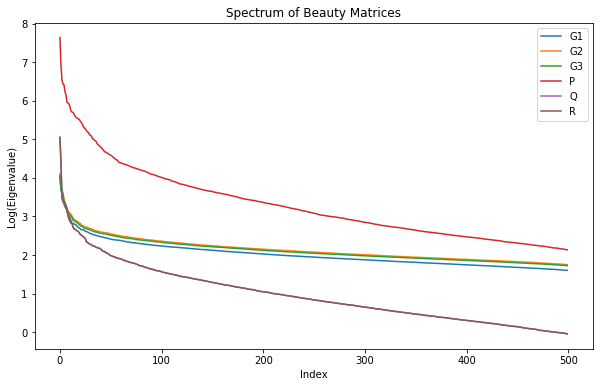

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(np.log10(svd_B_G1.singular_values_**2), label = 'G1')
plt.plot(np.log10(svd_B_G2.singular_values_**2), label = 'G2')
plt.plot(np.log10(svd_B_G3.singular_values_**2), label = 'G3')
plt.plot(np.log10(svd_B_P.singular_values_**2), label = 'P')
plt.plot(np.log10(svd_B_Q.singular_values_**2), label = 'Q')
plt.plot(np.log10(svd_B_R.singular_values_**2), label = 'R')
plt.title('Spectrum of Beauty Matrices')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Log(Eigenvalue)')

#### Show % of variance explained as a function of # of Principal Components (top-k eigenvectors)

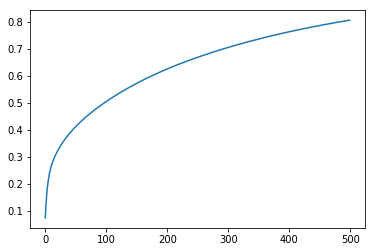

In [10]:
plt.plot(np.cumsum(svd_B_G1.explained_variance_ratio_))

#### Cellphone & Accessories brands (2014): Plot & Compare the eigenvalue spectrum of all 6 matrices

Text(0,0.5,'Log(Eigenvalue)')

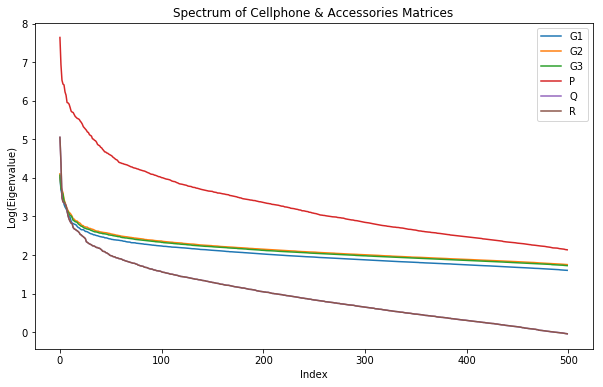

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(np.log10(svd_C_G1.singular_values_**2), label = 'G1')
plt.plot(np.log10(svd_C_G2.singular_values_**2), label = 'G2')
plt.plot(np.log10(svd_C_G3.singular_values_**2), label = 'G3')
plt.plot(np.log10(svd_C_P.singular_values_**2), label = 'P')
plt.plot(np.log10(svd_C_Q.singular_values_**2), label = 'Q')
plt.plot(np.log10(svd_C_R.singular_values_**2), label = 'R')
plt.title('Spectrum of Cellphone & Accessories Matrices')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Log(Eigenvalue)')

#### Show % of variance explained as a function of # of Principal Components (top-k eigenvectors)

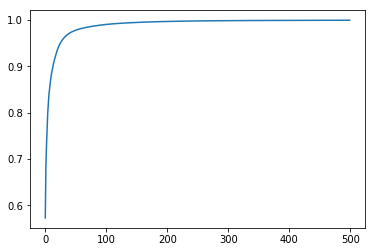

In [12]:
plt.plot(np.cumsum(svd_C_P.explained_variance_ratio_))

#### Electronics brands (2014): Plot & Compare the eigenvalue spectrum of all 6 matrices

Text(0,0.5,'Log(Eigenvalue)')

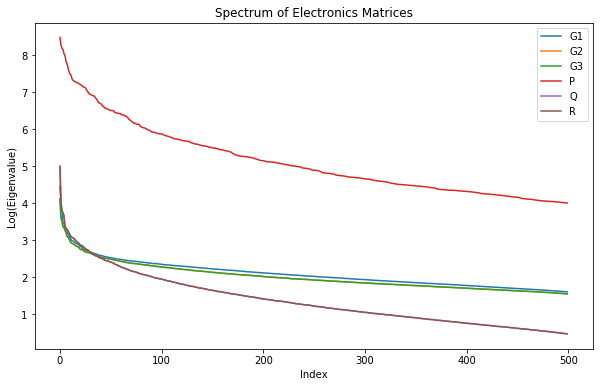

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(np.log10(svd_E_G1.singular_values_**2), label = 'G1')
plt.plot(np.log10(svd_E_G2.singular_values_**2), label = 'G2')
plt.plot(np.log10(svd_E_G3.singular_values_**2), label = 'G3')
plt.plot(np.log10(svd_E_P.singular_values_**2), label = 'P')
plt.plot(np.log10(svd_E_Q.singular_values_**2), label = 'Q')
plt.plot(np.log10(svd_E_R.singular_values_**2), label = 'R')
plt.title('Spectrum of Electronics Matrices')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Log(Eigenvalue)')

#### Show % of variance explained as a function of # of Principal Components (top-k eigenvectors)

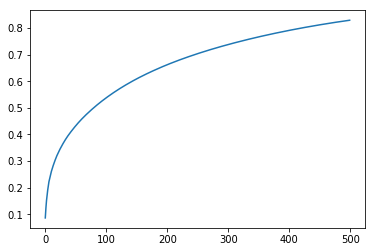

In [14]:
plt.plot(np.cumsum(svd_E_G3.explained_variance_ratio_))

### Cosine Distances for top-K eigenvectors

#### Plot Cosine Distances for Beauty

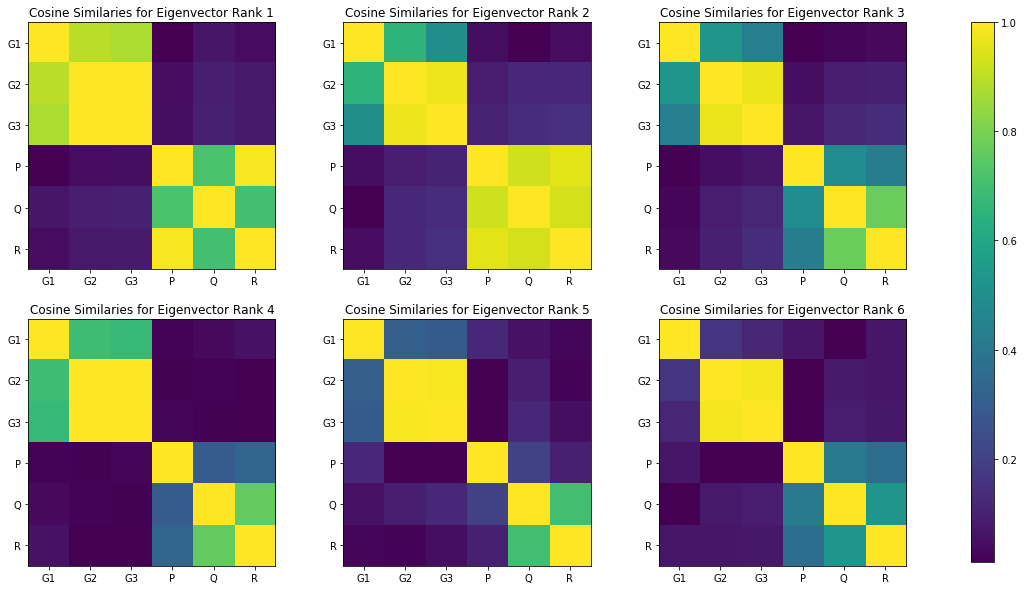

In [16]:
fig, ax = plt.subplots(figsize=(16, 10))
for k in range(6):
    X = np.concatenate((svd_B_G1.components_[[k],:], svd_B_G2.components_[[k],:], svd_B_G3.components_[[k],:],
                    svd_B_P.components_[[k],:], svd_B_Q.components_[[k],:], svd_B_R.components_[[k],:]), axis=0)
    a = cosine_similarity(X)    # 'cosine_similarity' applies cosine distances of vectors to a matrix 'X' 
    plt.subplot(2,3,k+1)
    plt.imshow(np.abs(a))
    plt.xticks(range(6), ['G1', 'G2', 'G3', 'P', 'Q', 'R'])
    plt.yticks(range(6), ['G1', 'G2', 'G3', 'P', 'Q', 'R'])
    
    plt.title('Cosine Similaries for Eigenvector Rank {0}'.format(k+1))    

cax = plt.axes([0.95, 0.13, 0.02, 0.75])
plt.colorbar(cax=cax)

#### NOTE: lighter shading = more correlated, darker shading = less correlated (see side scale)

#### Plot Cosine Distances for Cellphones

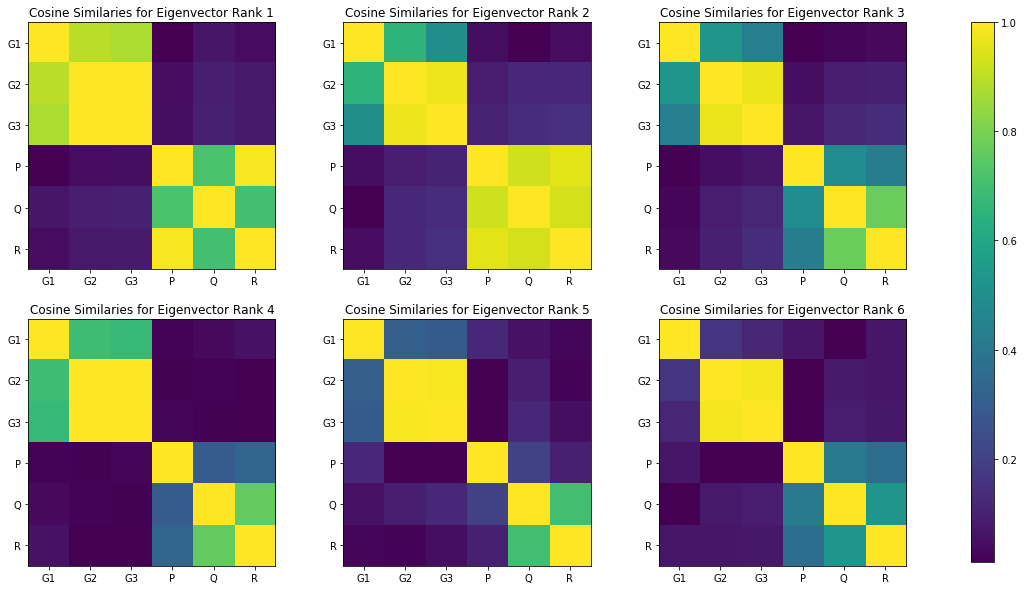

In [17]:
fig, ax = plt.subplots(figsize=(16, 10))
for k in range(6):
    X = np.concatenate((svd_C_G1.components_[[k],:], svd_C_G2.components_[[k],:], svd_C_G3.components_[[k],:],
                    svd_C_P.components_[[k],:], svd_C_Q.components_[[k],:], svd_C_R.components_[[k],:]), axis=0)
    a = cosine_similarity(X)
    plt.subplot(2,3,k+1)
    plt.imshow(np.abs(a))
    plt.xticks(range(6), ['G1', 'G2', 'G3', 'P', 'Q', 'R'])
    plt.yticks(range(6), ['G1', 'G2', 'G3', 'P', 'Q', 'R'])
    
    plt.title('Cosine Similaries for Eigenvector Rank {0}'.format(k+1))    

cax = plt.axes([0.95, 0.13, 0.02, 0.75])
plt.colorbar(cax=cax)

#### Plot Cosine Distances for Electronics

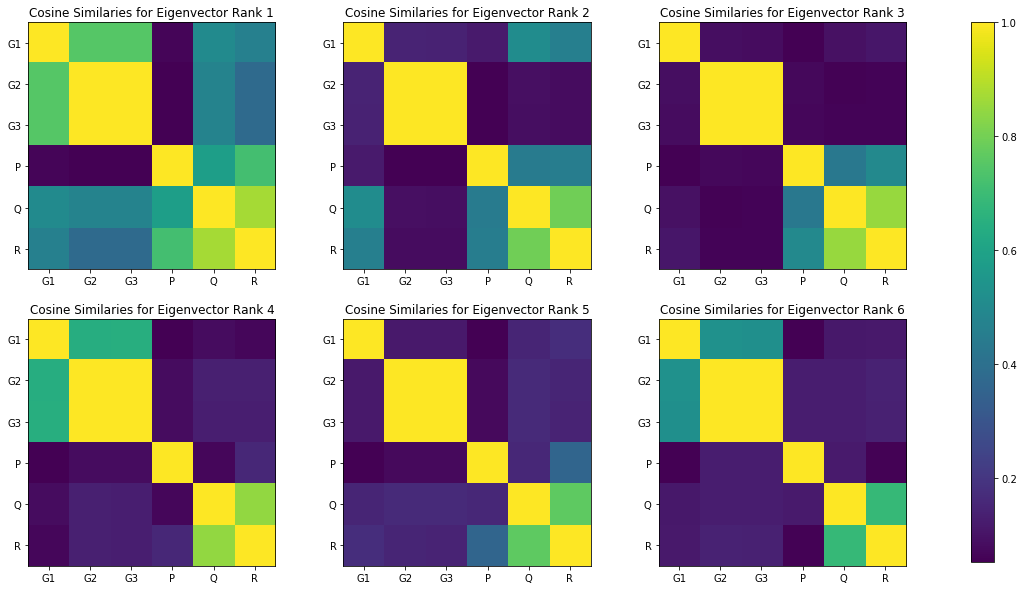

In [18]:
fig, ax = plt.subplots(figsize=(16, 10))
for k in range(6):
    X = np.concatenate((svd_E_G1.components_[[k],:], svd_E_G2.components_[[k],:], svd_E_G3.components_[[k],:],
                        svd_E_P.components_[[k],:], svd_E_Q.components_[[k],:], svd_E_R.components_[[k],:]), axis=0)
    a = cosine_similarity(X)
    plt.subplot(2,3,k+1)
    plt.imshow(np.abs(a))
    plt.xticks(range(6), ['G1', 'G2', 'G3', 'P', 'Q', 'R'])
    plt.yticks(range(6), ['G1', 'G2', 'G3', 'P', 'Q', 'R'])
    
    plt.title('Cosine Similaries for Eigenvector Rank {0}'.format(k+1))    

cax = plt.axes([0.95, 0.13, 0.02, 0.75])
plt.colorbar(cax=cax)

### Models Predicting The Top Eigenvectors of Gi (for all three product types)

#### K-Fold Cross-Validation (if desired)

In [19]:
if 0:
    E_nBrands = svd_E_P.components_.T[:,0].shape[0]
    X = np.concatenate((svd_E_P.components_.T[:,[0]], 
                        svd_E_Q.components_.T[:,[0]], 
                        svd_E_R.components_.T[:,[0]]), axis=1)
    y = svd_E_G1.components_.T[:,0]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=125)
    #print(X.shape)
    #print(y.shape)

    print("------------Electronics-------------")

    regr_lin = linear_model.LinearRegression()
    #scores = cross_val_score(regr_lin, X, y, cv=10)
    scores = regr_lin.fit(X_train, y_train).score(X_test, y_test)
    print("R2 of Linear Regression: {0:.2f}".format(scores))

    regr_fst = RandomForestRegressor()
    #scores = cross_val_score(regr_fst, X, y, cv=10, scoring='r2')
    scores = regr_fst.fit(X_train, y_train).score(X_test, y_test)
    print("R2 of Random Forest: {0:.2f}".format(scores))


    regr_bst = GradientBoostingRegressor()
    #scores = cross_val_score(regr_bst, X, y, cv=10, scoring='r2')
    #print("R2 of Gradient Boosting: {0:.2f} +- {1:.2f}".format(np.mean(scores), np.std(scores)))
    scores = regr_bst.fit(X_train, y_train).score(X_test, y_test)
    print("R2 of Gradient Boosting: {0:.2f}".format(scores))

#### Models for Electronics

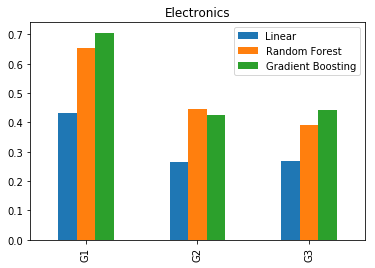

,Linear,Random Forest,Gradient Boosting
G1,0.431560,0.655555,0.706512
G2,0.265786,0.444311,0.424998
G3,0.267259,0.392720,0.441632


In [21]:
E_nBrands = svd_E_P.components_.T[:,0].shape[0]
X = np.concatenate((svd_E_P.components_.T[:,[0]], 
                    svd_E_Q.components_.T[:,[0]], 
                    svd_E_R.components_.T[:,[0]]), axis=1)

scores = []
for y in [svd_E_G1.components_.T[:,0], svd_E_G2.components_.T[:,0], svd_E_G3.components_.T[:,0]]:
    score = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
    regr_lin = linear_model.LinearRegression()
    score.append(regr_lin.fit(X_train, y_train).score(X_test, y_test))

    regr_fst = RandomForestRegressor()
    score.append(regr_fst.fit(X_train, y_train).score(X_test, y_test))


    regr_bst = GradientBoostingRegressor()
    score.append(regr_bst.fit(X_train, y_train).score(X_test, y_test))
    
    scores.append(score)

results = pd.DataFrame(scores, index=['G1', 'G2', 'G3'], columns=['Linear', 'Random Forest', 'Gradient Boosting'])
results.plot(kind='bar')
plt.title('Electronics')
plt.show()
results

#### Models for Beauty

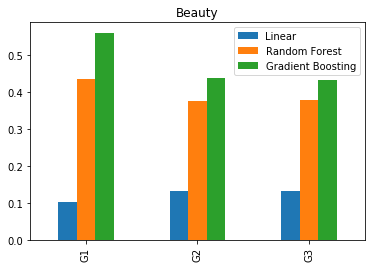

,Linear,Random Forest,Gradient Boosting
G1,0.101351,0.435622,0.561895
G2,0.130976,0.375924,0.440028
G3,0.132367,0.379418,0.432467


In [22]:
B_nBrands = svd_B_P.components_.T[:,0].shape[0]
X = np.concatenate((svd_B_P.components_.T[:,[0]], 
                    svd_B_Q.components_.T[:,[0]], 
                    svd_B_R.components_.T[:,[0]]), axis=1)

scores = []
for y in [svd_B_G1.components_.T[:,0], svd_B_G2.components_.T[:,0], svd_B_G3.components_.T[:,0]]:
    score = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
    regr_lin = linear_model.LinearRegression()
    score.append(regr_lin.fit(X_train, y_train).score(X_test, y_test))

    regr_fst = RandomForestRegressor()
    score.append(regr_fst.fit(X_train, y_train).score(X_test, y_test))


    regr_bst = GradientBoostingRegressor()
    score.append(regr_bst.fit(X_train, y_train).score(X_test, y_test))
    
    scores.append(score)

results = pd.DataFrame(scores, index=['G1', 'G2', 'G3'], columns=['Linear', 'Random Forest', 'Gradient Boosting'])
results.plot(kind='bar')
plt.title('Beauty')
plt.show()
results

#### Models for Cellphones

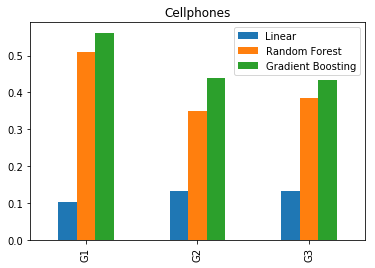

,Linear,Random Forest,Gradient Boosting
G1,0.101351,0.508832,0.562296
G2,0.130976,0.348767,0.439802
G3,0.132367,0.384448,0.432542


In [24]:
C_nBrands = svd_C_P.components_.T[:,0].shape[0]
X = np.concatenate((svd_C_P.components_.T[:,[0]], 
                    svd_C_Q.components_.T[:,[0]], 
                    svd_C_R.components_.T[:,[0]]), axis=1)
#print(X.shape)
#print(y.shape)

scores = []
for y in [svd_C_G1.components_.T[:,0], svd_C_G2.components_.T[:,0], svd_C_G3.components_.T[:,0]]:
    score = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
    regr_lin = linear_model.LinearRegression()
    score.append(regr_lin.fit(X_train, y_train).score(X_test, y_test))

    regr_fst = RandomForestRegressor()
    score.append(regr_fst.fit(X_train, y_train).score(X_test, y_test))


    regr_bst = GradientBoostingRegressor()
    score.append(regr_bst.fit(X_train, y_train).score(X_test, y_test))
    
    scores.append(score)

results = pd.DataFrame(scores, index=['G1', 'G2', 'G3'], columns=['Linear', 'Random Forest', 'Gradient Boosting'])
results.plot(kind='bar')
plt.title('Cellphones')
plt.show()
results